# **Data Science | One Month Remote Internship | Oasis InfoByte**

## **Task 01: Iris Flower Classification**

 - Iris flower has three species, setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.
 - Although the Scikit-learn library provides a dataset for iris flower classification.



### **Import Python Libraries**

In [55]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings
import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

### **Import Iris Flower Classification Dataset**

In [57]:
# Import Iris Flower DataSet
df = pd.read_csv("iris.csv")

In [58]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [61]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### **Summarize (Summary Statistics)**

In [62]:
# Summarize (Summary Statistics)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


### **Find Null Values**

In [63]:
# find Null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **Finding Unique Values**

In [64]:
# Finding Unique Values
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [65]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [66]:
print("Shape of Iris Flower DataSet: ", df.shape, "\n150 Rows and 6 Columns.")

Shape of Iris Flower DataSet:  (150, 6) 
150 Rows and 6 Columns.


In [67]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 6)


In [68]:
df.count()      # Used to count the number of rows

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

### **Visualixe the nan Values in heattmap**

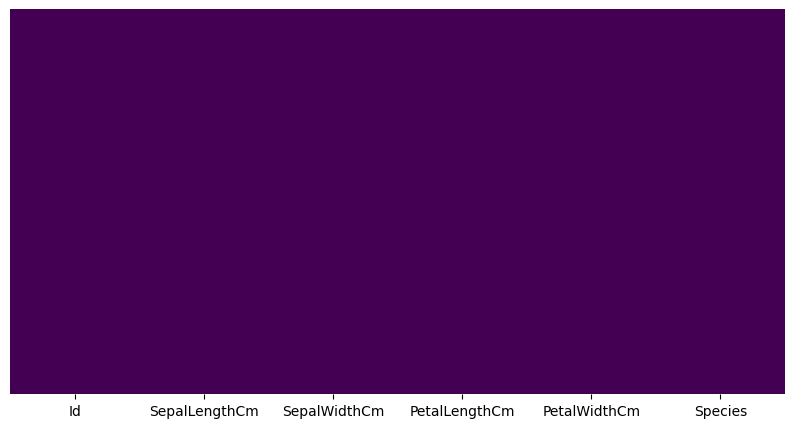

In [69]:
# Visualixe the nan Values in heattmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

### **Visualize and Explore**

#### **Detecting Outliers**

<Axes: xlabel='SepalLengthCm'>

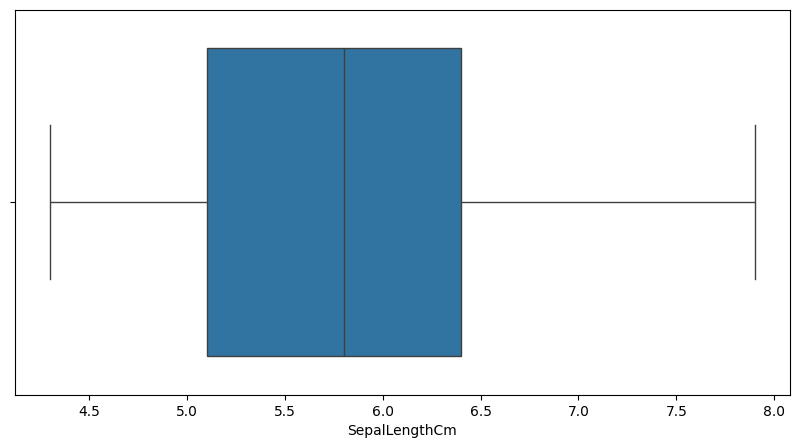

In [70]:
sns.boxplot(x=df['SepalLengthCm'])

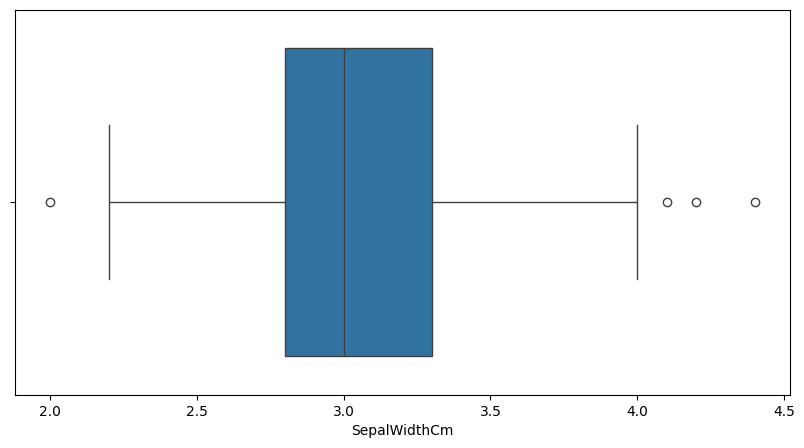

In [71]:
sns.boxplot(x=df['SepalWidthCm'])
plt.show()

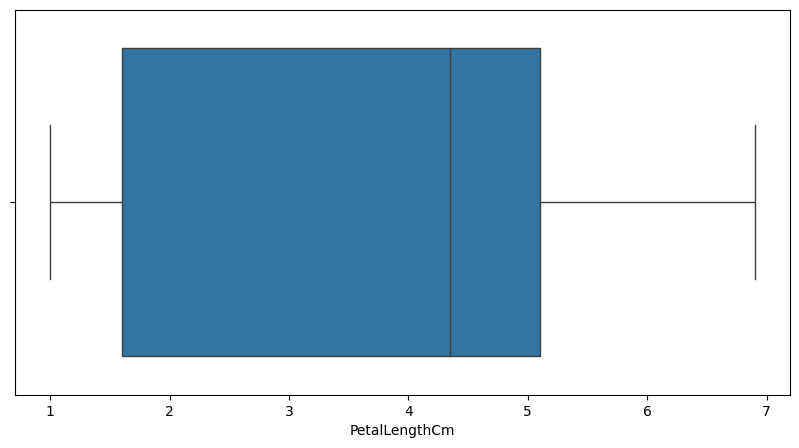

In [72]:
sns.boxplot(x=df['PetalLengthCm'])
plt.show()

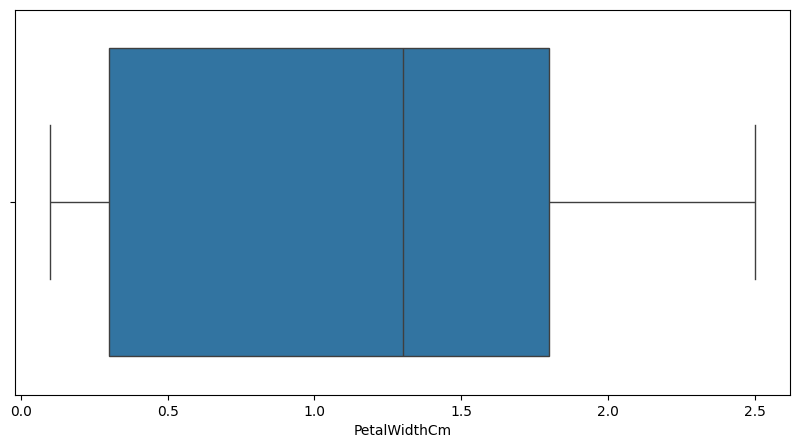

In [73]:
sns.boxplot(x=df['PetalWidthCm'])
plt.show()

#### **Counts of Species**

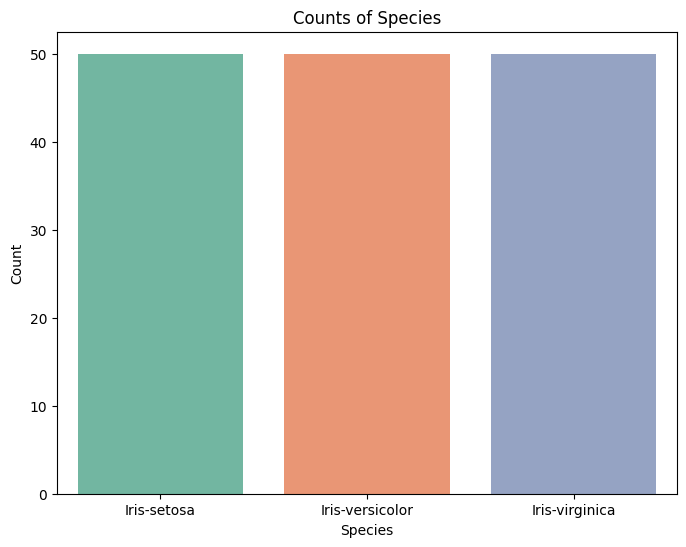

In [74]:
# Counts of Species
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x='Species', palette='Set2')
plt.title('Counts of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

#### **Count of Sepal width**

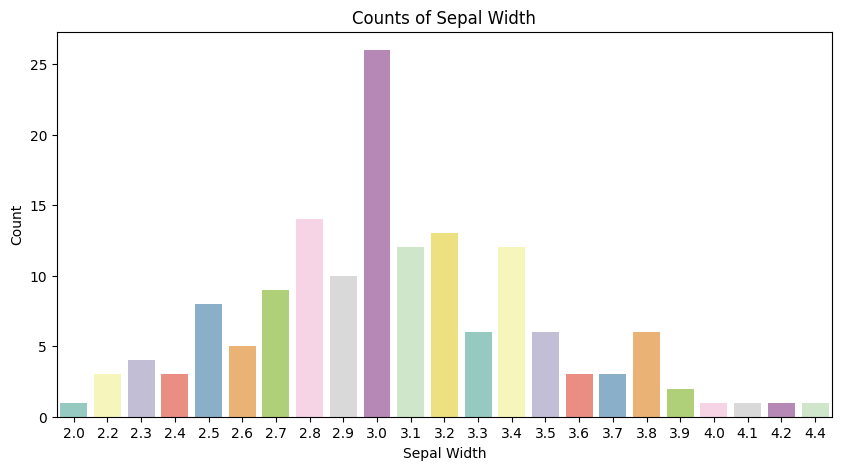

In [75]:
# Count of Sepal width
sns.countplot(data=df, x='SepalWidthCm', palette='Set3')
plt.title('Counts of Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Count')
plt.show()

#### **Data Distribution**

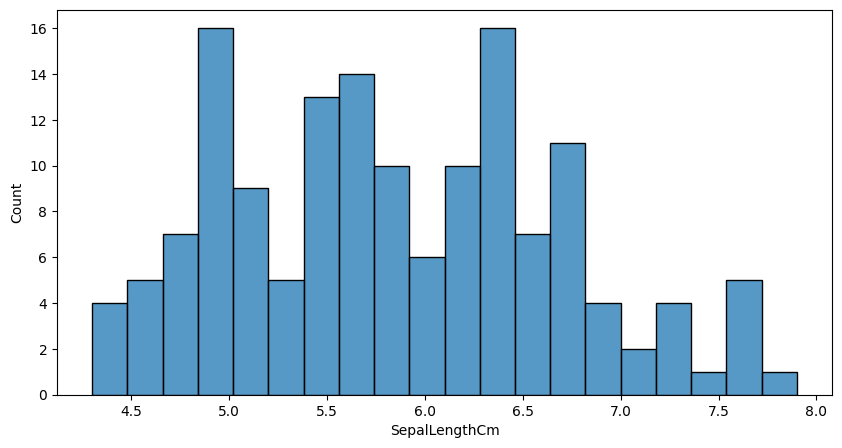

In [76]:
# Data Distribution
sns.histplot(data = df, x = "SepalLengthCm", bins =20)
plt.show()

#### **Count of Petal Length**

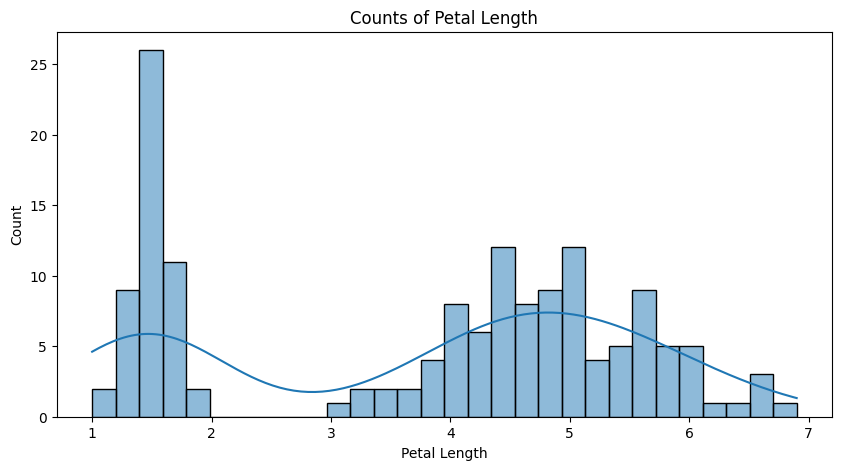

In [77]:
# Count of Petal Length
sns.histplot(data= df, x='PetalLengthCm', bins=30, kde=True)
plt.title('Counts of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.show()

#### **Count of Petal Width**

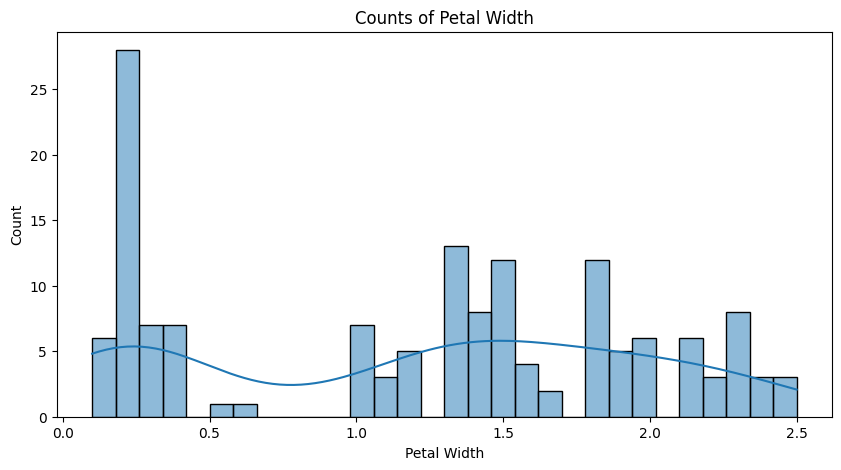

In [78]:
# Count of Petal Width
sns.histplot(data= df, x='PetalWidthCm', bins=30, kde=True)
plt.title('Counts of Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Count')
plt.show()

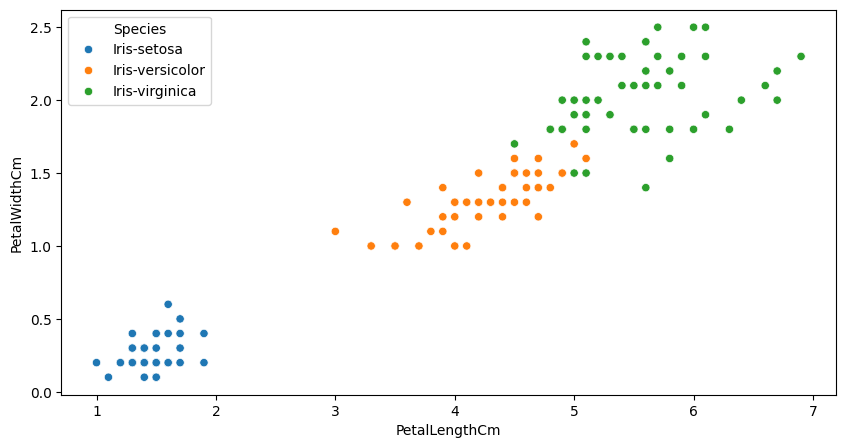

In [79]:
sns.scatterplot(data=df, x ="PetalLengthCm", y ="PetalWidthCm", hue="Species")
plt.show()

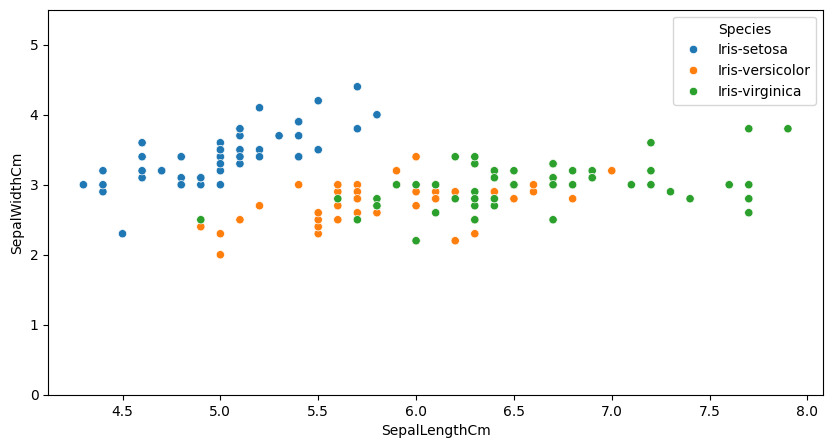

In [80]:
sns.scatterplot(data=df, x ="SepalLengthCm", y ="SepalWidthCm", hue="Species")
plt.ylim(0, 5.5)
plt.show()

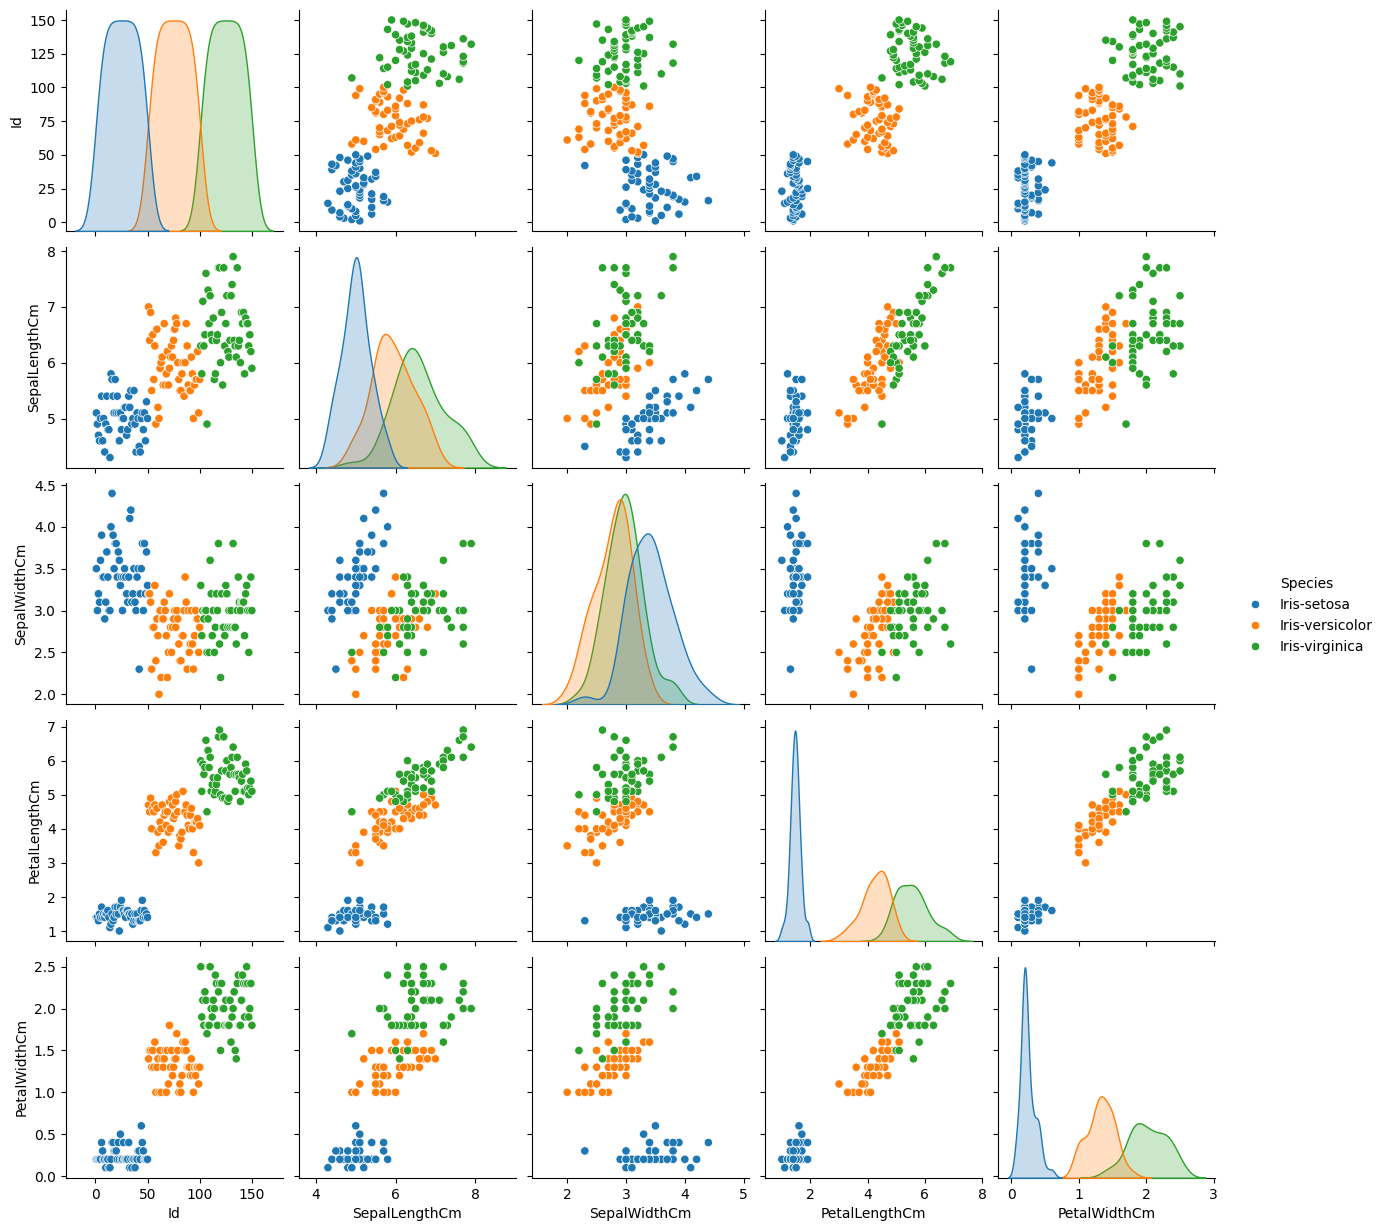

In [81]:
sns.pairplot(df, hue = "Species")
plt.show()

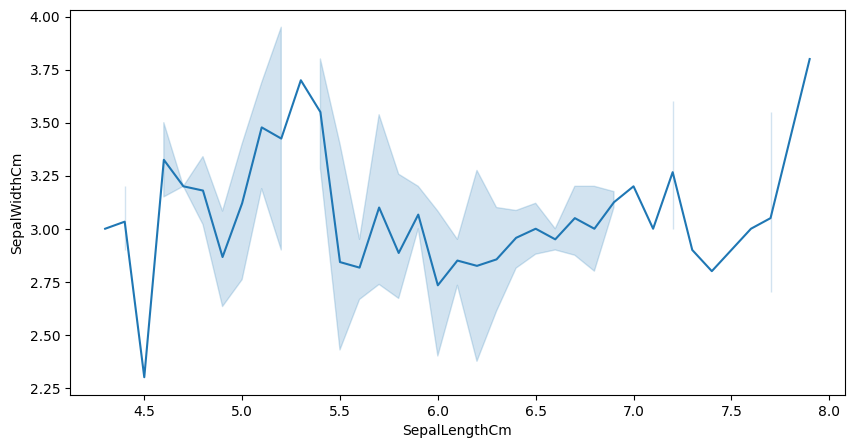

In [82]:
sns.lineplot(x="SepalLengthCm", y="SepalWidthCm", data=df)
plt.show()

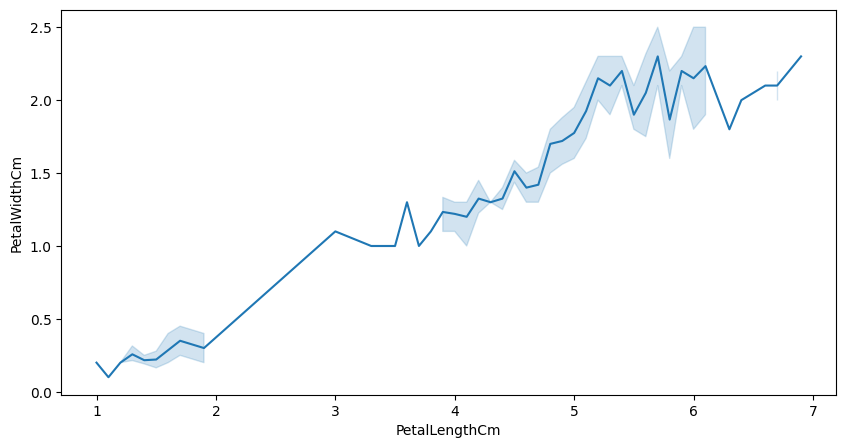

In [83]:
sns.lineplot(x="PetalLengthCm", y="PetalWidthCm", data=df)
plt.show()

### **Split the dataset into features (X) and target (y)**

In [84]:
# Split the dataset into features (X) and target (y)
X = df.drop('Species', axis=1)
y = df['Species']

### **Split the data into training and testing sets**

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)

Shape of X_train: (120, 5)
Shape of y_train: (120,)
Shape of X_test: (30, 5)
Shape of y_test: (30,)


### **Standardize the features**

In [87]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Train a K-Nearest Neighbors (KNN) classifier**

In [88]:
# Train a K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### **Predictions on the test set**

In [89]:
# Predictions on the test set
y_pred = knn_model.predict(X_test)

### **Evaluate the model**

In [90]:
# Evaluate the model
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [91]:
print("classification Report:\n",classification_report(y_test, y_pred))

classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [92]:
knn_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', knn_accuracy,'%')

Accuracy 100.0 %


In [93]:
print("y_test:\n\n",y_test)

y_test:

 73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Species, dtype: object


In [94]:
print("y_pred:\n\n", y_pred)

y_pred:

 ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


### **User input for prediction**

#### **Assuming scaler was fitted on training data with 5 features**
#### **Check the number of features in the scaler**

In [95]:
#User Input for Prediction
# Assuming scaler was fitted on training data with 5 features
# Check the number of features in the scaler
print("Number of features in the scaler:", scaler.n_features_in_)

# User input for prediction
user_input = np.array([[5.1, 3.5, 1.4, 0.2, 1.0]])  # Add the missing feature

# Transform the user input
user_input_scaled = scaler.transform(user_input)

# Continue with prediction
prediction = knn_model.predict(user_input_scaled)

Number of features in the scaler: 5


In [96]:
print(f'The predicted iris species is: {prediction[0]}')

The predicted iris species is: Iris-versicolor
